### Define PPM

In [1]:
from src.PPM import ppm
import numpy as np

# Define link lengths and create PPM
A_link,B_link,C_link,D_link = 25.15,38,76,58.25
Rr = 1
PPM = ppm.mechanism(A=A_link,B=B_link,C=C_link,D=D_link)

# Define function for adding noise to PPM
def add_noise(PPM,sigma):
    A = A_link + np.random.normal(scale=sigma,size=2)
    B = B_link + np.random.normal(scale=sigma,size=6)
    C = C_link + np.random.normal(scale=sigma,size=3)
    D = D_link + np.random.normal(scale=sigma,size=2)
    PPM.update_links(Rr = 1,A_links=A,B_links=B,C_links=C,D_links=D)


### Sweep of P_error (100*sigma/L_char)

In [4]:
n = 20
samples = 100
Error_in = np.linspace(0,1.5,n) # (100*sigma/L_char)
Theta_max_sweep = np.linspace(5,30,n) # Configuration Space (rad)
R_workspace = np.zeros(np.size(Theta_max_sweep))
Error_out = np.zeros([n,n]) # Output error

for i,e in enumerate(Error_in):
    for j,theta in enumerate(Theta_max_sweep):
        E = []
        for test in range(samples):
            result = False
            attempts = 0
            while not result and attempts < 0.25*samples: # Only allow 25% failed attempts
                try:
                    PPM.theta_max = np.deg2rad(theta)
                    sigma = (e/100)*PPM.L_char
                    add_noise(PPM,sigma)
                    e_out,w = PPM.find_surface()
                    result = True
                    E.append(e_out)
                    if i == 0: R_workspace[j] = w # Generate workspace array for 0 error cases
                except Exception as err:
                    valid = False
                    attempts += 1
                    if attempts > 50: 
                        print("***FAILED ATTEMPT***")
                        E = [np.nan]
                    print(err,sigma,theta)
        Error_out[i][j] = np.mean(E)   


c:\Users\Kuba\Documents\Code\ppm-analysis\src\PPM\ppm.py:60: RuntimeWarning: invalid value encountered in arccos
  T = np.arccos(ratio)


array must not contain infs or NaNs 0.40795228629473684 30.0
array must not contain infs or NaNs 0.4759443340105263 27.368421052631582
array must not contain infs or NaNs 0.5439363817263159 28.68421052631579
array must not contain infs or NaNs 0.6119284294421053 18.157894736842106
array must not contain infs or NaNs 0.6119284294421053 22.10526315789474
array must not contain infs or NaNs 0.6119284294421053 28.68421052631579
array must not contain infs or NaNs 0.6119284294421053 28.68421052631579
array must not contain infs or NaNs 0.6119284294421053 30.0
array must not contain infs or NaNs 0.6119284294421053 30.0
array must not contain infs or NaNs 0.6119284294421053 30.0
array must not contain infs or NaNs 0.6799204771578948 7.631578947368421
array must not contain infs or NaNs 0.6799204771578948 16.842105263157897
array must not contain infs or NaNs 0.6799204771578948 16.842105263157897
array must not contain infs or NaNs 0.6799204771578948 18.157894736842106
array must not contain i

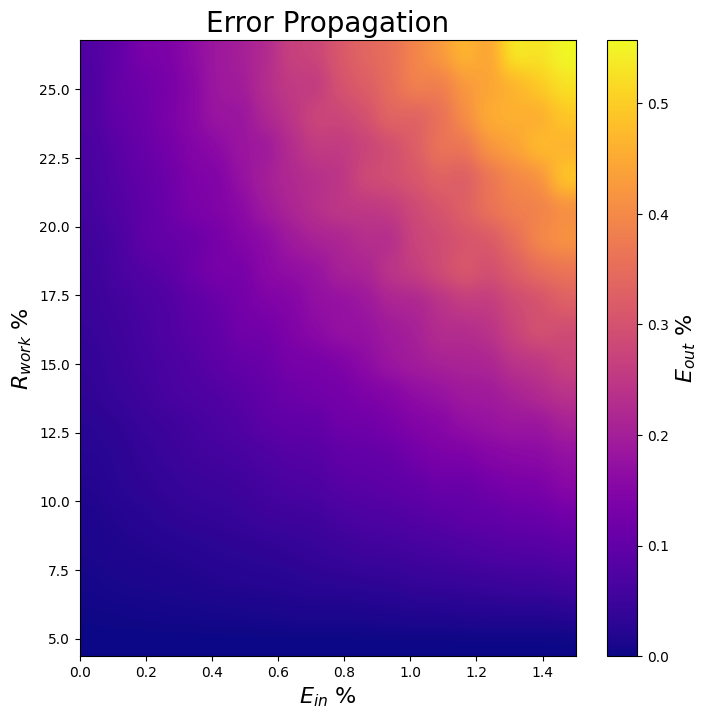

In [5]:
import matplotlib.pyplot as plt
plt.imshow(Error_out,cmap="plasma",interpolation="gaussian",origin="lower",aspect="auto",extent=(Error_in[0],Error_in[-1],R_workspace[0],R_workspace[-1]))
cb = plt.colorbar()
cb.set_label("$E_{out}$ %",fontsize=16)
#cb.formatter.set_powerlimits((0, 0))
plt.xlabel("$E_{in}$ %",fontsize=16)
plt.ylabel("$R_{work}$ %",fontsize=16)
plt.title("Error Propagation",fontsize = 20)
fig = plt.gcf()
fig.set_size_inches((8,8))
plt.show()